# Find identity term matches in data

See process_data.py

In [1]:
# Load incels data
import pandas as pd
import csv

path = '../../data/incels/all_comments.csv'
# data = pd.read_csv(path, engine='python', on_bad_lines=lambda x: print(x))
data = pd.read_csv(path, engine='python', on_bad_lines=lambda row: row[:-2].append(' '.join(row[-2:]))) # combine last 2 elements in a line mentioning Gulag
data['parsed_date'] = pd.to_datetime(data.date, errors='coerce') # "yesterday" etc not handled
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   type         object        
 1   forum        object        
 2   thread       object        
 3   username     object        
 4   date         object        
 5   content      object        
 6   parsed_date  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 333.7+ MB


## NetMapper identity term list

In [92]:
# Load identity terms
import pandas as pd

nm_identities_path = '../resources/generic_agents-identity_v15_2021_10_15.xlsx'
multi_identities = pd.read_excel(nm_identities_path)
multi_identities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19887 entries, 0 to 19886
Columns: 156 entries, Akan to Category 4
dtypes: float64(56), int64(1), object(99)
memory usage: 23.7+ MB


In [93]:
# Filter to English, remove duplicates
cols = multi_identities.columns.tolist()
en_identities = multi_identities[cols[cols.index('English'):]]
en_identities['term'] = en_identities['English'].str.lower()
en_identities.drop_duplicates(subset='term', inplace=True)
en_identities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19035 entries, 0 to 19886
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   English          19035 non-null  object 
 1   conceptTo        19035 non-null  object 
 2   metaOntology     19035 non-null  object 
 3   nodeType         0 non-null      float64
 4   Category 1       9703 non-null   object 
 5   Category 2       911 non-null    object 
 6   Category 3       18929 non-null  object 
 7   Country          4712 non-null   object 
 8   First Name       0 non-null      float64
 9   Last Name        0 non-null      float64
 10  Gender           759 non-null    object 
 11  Suffix           0 non-null      float64
 12  Language         0 non-null      float64
 13  Acronym          336 non-null    object 
 14  Valence          19035 non-null  object 
 15  Evaluation       19035 non-null  int64  
 16  Potency          10 non-null     float64
 17  Activity    

/tmp/ipykernel_4157208/3338936415.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4157208/3338936415.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
[identity for identity in en_identities.term if 'black' in identity]

['black american',
 'black americans',
 'black mamba boy',
 'black mambas',
 'black muslim',
 'black muslims',
 'black piranha',
 'black prince',
 'black sheep',
 'black southafricans',
 'black sudanese',
 'million black sudanese',
 'black swan',
 'black widow',
 'black wolf',
 'blackfoot',
 'blackhorse',
 'blackman',
 'blacksmith',
 'blacksmiths',
 'ex black',
 'ex-black',
 'royal black member',
 'royal black members',
 'royal black preceptory members',
 'blackmailer',
 'blackmailers']

In [95]:
[identity for identity in en_identities.term if 'white' in identity]

['white man',
 'whiteman',
 'poorwhitetrash',
 'whitenigger',
 'whitetrash',
 'ex white house aide',
 'ex-white house aide',
 'gangs of whites',
 'nonwhites',
 'white anglo saxon protestant',
 'white anglo-saxon protestant',
 'white house adviser',
 'white house aide',
 'white house aides',
 'white houseofficials',
 'white house spokesman',
 'white house spokesperson',
 'white house spokeswoman',
 'white housespokesperson',
 'white nile chairman',
 'white slave',
 'white witch']

In [18]:
# Separate out stopwords
stops = en_identities[en_identities['stop word']==1]
exclude_list = ['don', 'other', 'others', 'friend', 'friends', 'people', 'who', 'asshole', 'dick',
               'character', 'person', 'people', 'majority', 'bot', 'everyone', 'everyone here',
                'officially', 'tech', 'individual', 'worker', 'workers', 'giant', 'human', 'humans', 'ass',
                'nobody', 'brother', 'sister', 'mother', "mother's", 'father', 'daughter', 'son', 'mom', 'wife', 'wives', 'husband', 'husbands', 'cousin', 'cousins',
                'they all', 'count', 'god', 'general', 'user', 'users', 'member', 'members', 'english', 'finish', 'slayer', 'speaker',
                'misogynist', 'king', 'queen', 'rn', 'fellow', 'buddy', 'enemies', 'corpse', 'revolutionary', 'gymnast', 'messiah', 'jesus', 'embryo',
                'dr', 'doctor', 'dahmer', 'characters', 'cheat', 'sexist', 'professional', 'client', 'mate', 'dad', 'customers', 'assholes', 'whose',
                'mama', 'co-workers', 'employees', 'uncle', 'hermit', 'ogre', 'potter', 'phantom', 'dwellers', 'saviour', 'prophet', 'morons', 'guide',
                'majors', 'partners', 'villain', 'agent', 'model', 'juggernaut', 'ego', 'avatar', 'player', 'dragon', 'pm', 'winner', 'winners', 'surrogate', 'nudes',
               ]
exclude = en_identities[en_identities['term'].isin(exclude_list)]
identities = en_identities[(en_identities['stop word']!=1) & (~en_identities['term'].isin(exclude_list))]

# Search for identity matches
import re

pats = [re.compile(r'\b{}\b'.format(re.escape(term))) for term in identities['term']]
print(len(pats))

def contains_match(text):
    """ Return matched patterns present in text """ 
    return [re.search(p, str(text).lower()).group() for p in pats if re.search(p, str(text).lower()) is not None]

from collections import Counter

sample = data.sample(1000)

18837


In [8]:
# Filter to terms present at least once in the combined text (make this as fast as possible)
# vocab = set(data.content.astype('str').str.lower().str.split().sum()) # doesn't tokenize (remove punct) but whatever
vocab = set()
data.content.astype('str').str.lower().str.split().apply(vocab.update)
len(vocab)

1782573

In [19]:
from tqdm.notebook import tqdm

present_terms = [term for term in identities['term'] if term in vocab]
len(present_terms)

5564

In [21]:
pats_combo = re.compile(r'|'.join([(r'\b{}\b'.format(re.escape(term.lower()))) for term in present_terms]))
# pats_combo

def contains_match(text):
    """ Return matched patterns present in text """ 
    return re.findall(pats_combo, str(text).lower())

In [21]:
%%timeit -n 1 -r 1
# With separate re.search

sample['nm_identity_matches'] = sample.content.map(contains_match)
# sample[sample.nm_identity_matches.str.len() > 0]

58.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [22]:
# %%timeit -n 1 -r 3
# With combined re

sample['nm_identity_matches'] = sample.content.map(contains_match)
# sample[sample.nm_identity_matches.str.len() > 0]

In [23]:
identity_ctr = Counter(sample.nm_identity_matches.sum())
identity_ctr.most_common()

[('women', 78),
 ('man', 55),
 ('men', 55),
 ('jews', 27),
 ('bro', 26),
 ('female', 24),
 ('girls', 22),
 ('woman', 20),
 ('male', 19),
 ('jew', 15),
 ('virgin', 15),
 ('males', 14),
 ('whore', 14),
 ('whores', 14),
 ('girl', 14),
 ('intellectual', 14),
 ('females', 13),
 ('dude', 13),
 ('intellectuals', 13),
 ('arabs', 11),
 ('asian', 11),
 ('nigger', 10),
 ('faggot', 10),
 ('feminist', 9),
 ('niggers', 9),
 ('subhuman', 8),
 ('child', 8),
 ('christian', 8),
 ('girlfriend', 7),
 ('arab', 7),
 ('leftist', 7),
 ('chinese', 6),
 ('muslim', 6),
 ('asians', 6),
 ('nazi', 6),
 ('enemy', 5),
 ('dudes', 5),
 ('catholic', 5),
 ('fag', 5),
 ('boyfriend', 5),
 ('indian', 5),
 ('european', 5),
 ('kid', 5),
 ('scum', 4),
 ('driver', 4),
 ('indians', 4),
 ('christ', 4),
 ('socialist', 4),
 ('hookers', 4),
 ('virgins', 4),
 ('kids', 4),
 ('sluts', 4),
 ('racist', 4),
 ('leader', 4),
 ('socialists', 4),
 ('american', 4),
 ('bitch', 4),
 ('brits', 3),
 ('jerk', 3),
 ('teacher', 3),
 ('hunter', 3),
 (

# Visualize identity term matches

In [154]:
# Load identity term matches
import pandas as pd

path = '../../data/incels/processed_comments.pkl'
data = pd.read_pickle(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 8 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   type                        object        
 1   forum                       object        
 2   thread                      object        
 3   username                    object        
 4   date                        object        
 5   content                     object        
 6   parsed_date                 datetime64[ns]
 7   netmapper_identity_matches  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 381.4+ MB


## Total matches

In [155]:
exp = data.explode('netmapper_identity_matches')
# freq = pd.DataFrame(exploded.netmapper_identity_matches.value_counts(), columns=['term', 'count'])

freq = exp.netmapper_identity_matches.value_counts().to_frame(name='count').reset_index(names='identity_term')
freq.head(20)

,identity_term,count
0,women,549606
1,men,396498
2,man,265317
3,girls,176214
4,girl,161948
5,bro,150947
6,woman,135172
7,female,131854
8,male,121319
9,females,85594


## Group identity terms

83


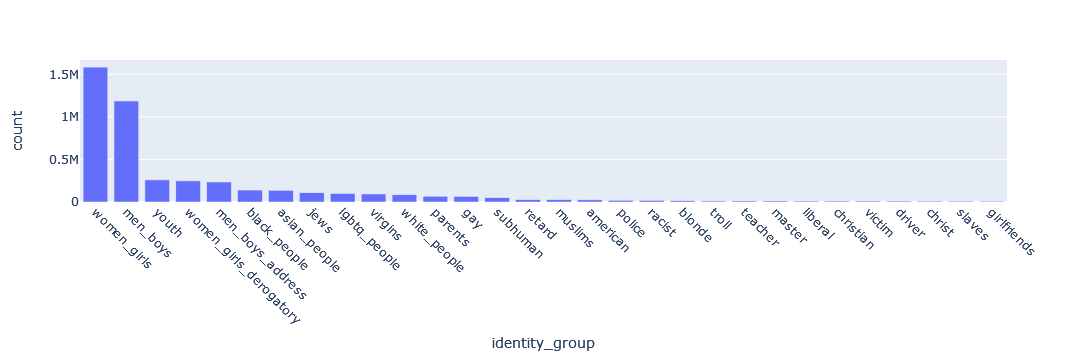

In [156]:
import json

identity_groups_fpath = '../resources/identity_groups.json'
with open(identity_groups_fpath, 'r') as f:
    identity_groups = json.load(f)
print(len(identity_groups))

exp['identity_group'] = exp.netmapper_identity_matches.map(lambda x: identity_groups.get(x, x))
exploded = exp.explode('identity_group') # Count intersectional mentions as a mention in each of their categories
gp_freq = exploded.identity_group.value_counts().to_frame(name='count').reset_index(names='identity_group')
gp_freq.head(30)

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# fig = px.bar(gp_freq.head(50), x='term', y='count')
fig = px.bar(gp_freq.head(30), x='identity_group', y='count')
fig.update_xaxes(tickangle=45)

In [147]:
from collections import defaultdict

gp_vals = defaultdict(list)
for key, vals in identity_groups.items():
    for gp in vals:
        gp_vals[gp].append(key)
        
for gp, terms in gp_vals.items():
    print(f'{gp}: {terms}')

women_girls: ['women', 'woman', 'girls', 'girl', 'girlfriend', 'female', 'females', 'whore', 'whores', 'bitch', 'bitches', 'slut', 'sluts', 'cunt', 'cunts', 'black women', 'feminist', 'feminists', 'white women']
men_boys: ['men', 'man', 'boy', 'boys', 'boyfriend', 'bro', 'dude', 'dudes', 'male', 'males', 'black men', 'white men', 'bf']
men_boys_address: ['bro', 'dude', 'dudes']
women_girls_derogatory: ['whore', 'whores', 'bitch', 'bitches', 'slut', 'sluts', 'cunt', 'cunts']
youth: ['kids', 'kid', 'child', 'children', 'baby', 'teen', 'teens']
virgins: ['virgin']
lgbtq_people: ['faggot', 'faggots', 'fag', 'fags', 'tranny']
jews: ['jews', 'jew', 'jewish', 'kike', 'kikes', 'zionist', 'zionists', 'judaism', 'israelite', 'israelites', 'goy', 'goyim']
black_people: ['black people', 'black man', 'black woman', 'black men', 'black women', 'nigger', 'nigga', 'niggers', 'niggas', 'niggaz', 'nigr', 'nigra', 'nigre', 'niggur', 'african']
asian_people: ['asian', 'asians', 'indian', 'japanese', 'chin

In [79]:
all_identities = exploded.netmapper_identity_matches.unique()
len(all_identities)

5467

In [84]:
for term in ['jew', 'jews', 'jewish', 'kike', 'kikes', 'zionist', 'zionists', 'judaism', 'israelite', 'israelites', 'goy', 'goyim']:
    print(f'{term}: {term in all_identities}')

jew: True
jews: True
jewish: False
kike: True
kikes: False
zionist: True
zionists: True
judaism: False
israelite: True
israelites: True
goy: False
goyim: False


In [134]:
for term in ['gay', 'gays', 'lesbian', 'trans', 'transgender', 'bi', 'bisexual', 'pansexual', 'homosexual', 'homo', 'queer',
            'transman', 'transwoman', 'queers', 'fag', 'fags']:
    print(f'{term}: {term in all_identities}')

gay: False
gays: True
lesbian: True
trans: False
transgender: False
bi: False
bisexual: False
pansexual: False
homosexual: True
homo: True
queer: True
transman: False
transwoman: False
queers: False
fag: True
fags: False


In [89]:
[identity for identity in all_identities if 'black' in str(identity)]

['blacksmith',
 'blacksmiths',
 'blackman',
 'blackfoot',
 'blackmailer',
 'blackmailers']

In [91]:
[identity for identity in all_identities if 'white' in str(identity)]

['nonwhites', 'whiteman', 'whitetrash']

In [96]:
[identity for identity in all_identities if ' ' in str(identity)]

[]

In [104]:
[identity for identity in all_identities if 'nig' in str(identity)]

['niggers',
 'niggas',
 'nigger',
 'knight',
 'nig',
 'knights',
 'nigga',
 'niggah',
 'nigerian',
 'sandnigger',
 'niggaz',
 'knighted',
 'knightly',
 'niglet',
 'nigra',
 'knighthood',
 'nigerians',
 'nigg',
 'snownigger',
 'nigr',
 'niggur',
 'datnigga',
 'nigre']

In [103]:
import re

re.search(r'\b{}\b'.format(re.escape('black man')), 'black man walking').group()
# re.search(r'\b{}\b'.format(re.escape('black man')), 'asian man walking').group()

'black man'

## Matches over time

In [148]:
# post_counts = data.groupby(pd.Grouper(key='parsed_date', freq='MS'))['content'].count()
data['word_count'] = data.content.str.split().str.len()

word_counts = data.groupby(pd.Grouper(key='parsed_date', freq='MS'))['word_count'].sum()
word_counts

In [150]:
# exploded = data.explode('netmapper_identity_matches').dropna(subset='netmapper_identity_matches')
# counts_overtime = exploded.groupby([pd.Grouper(key='parsed_date', freq='MS'), 'netmapper_identity_matches']).size().to_frame(name='count').reset_index(names=['parsed_date', 'identity_term'])
counts_overtime = exploded.groupby([pd.Grouper(key='parsed_date', freq='MS'), 'identity_group']).size().to_frame(name='term_count').reset_index(names=['parsed_date', 'identity_group'])
counts_overtime

,parsed_date,identity_group,term_count
0,2017-11-01,a-listers,1
1,2017-11-01,aboriginal,21
2,2017-11-01,aboriginals,24
3,2017-11-01,aborigines,4
4,2017-11-01,abuser,8
...,...,...,...
105768,2021-04-01,youth,1306
105769,2021-04-01,zealander,1
105770,2021-04-01,zimbabwe,1
105771,2021-04-01,zombie,11


In [151]:
counts_overtime = counts_overtime.join(word_counts, on='parsed_date').rename(columns={'content': 'word_count'})
counts_overtime

,parsed_date,identity_group,term_count,word_count
0,2017-11-01,a-listers,1,2709033.0
1,2017-11-01,aboriginal,21,2709033.0
2,2017-11-01,aboriginals,24,2709033.0
3,2017-11-01,aborigines,4,2709033.0
4,2017-11-01,abuser,8,2709033.0
...,...,...,...,...
105768,2021-04-01,youth,1306,1181721.0
105769,2021-04-01,zealander,1,1181721.0
105770,2021-04-01,zimbabwe,1,1181721.0
105771,2021-04-01,zombie,11,1181721.0


In [152]:
import numpy as np

counts_overtime['mention_prob'] = counts_overtime['term_count'] / counts_overtime.word_count
counts_overtime['log_prob'] = counts_overtime['mention_prob'].map(np.log10)
counts_overtime

,parsed_date,identity_group,term_count,word_count,mention_prob,log_prob
0,2017-11-01,a-listers,1,2709033.0,3.691354e-07,-6.432814
1,2017-11-01,aboriginal,21,2709033.0,7.751844e-06,-5.110595
2,2017-11-01,aboriginals,24,2709033.0,8.859250e-06,-5.052603
3,2017-11-01,aborigines,4,2709033.0,1.476542e-06,-5.830754
4,2017-11-01,abuser,8,2709033.0,2.953083e-06,-5.529724
...,...,...,...,...,...,...
105768,2021-04-01,youth,1306,1181721.0,1.105168e-03,-2.956572
105769,2021-04-01,zealander,1,1181721.0,8.462234e-07,-6.072515
105770,2021-04-01,zimbabwe,1,1181721.0,8.462234e-07,-6.072515
105771,2021-04-01,zombie,11,1181721.0,9.308458e-06,-5.031122


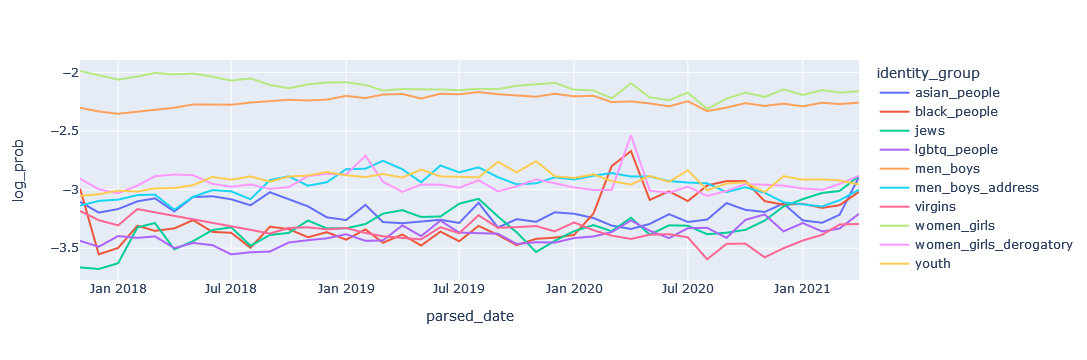

In [153]:
# Filter to most popular terms overall
# filtered = counts_overtime[counts_overtime['identity_term'].isin(freq.term.head(20))]
filtered = counts_overtime[counts_overtime['identity_group'].isin(gp_freq.identity_group.head(10))]

# Plot
import plotly.express as px

# px.line(filtered, x='parsed_date', y='count', color='identity_term')
# px.line(filtered, x='parsed_date', y='mention_prob', color='identity_group')
px.line(filtered, x='parsed_date', y='log_prob', color='identity_group')

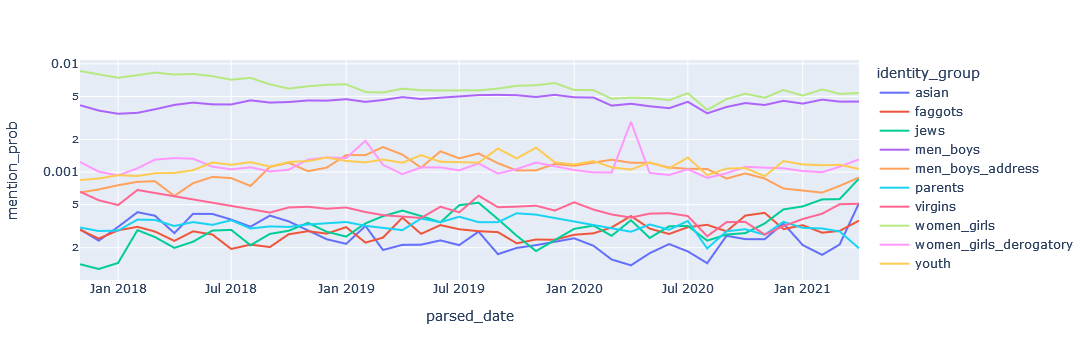

In [78]:
# Filter to most popular terms overall
# filtered = counts_overtime[counts_overtime['identity_term'].isin(freq.term.head(20))]
filtered = counts_overtime[counts_overtime['identity_group'].isin(gp_freq.identity_group.head(10))]

# Plot
import plotly.express as px

# px.line(filtered, x='parsed_date', y='count', color='identity_term')
# px.line(filtered, x='parsed_date', y='mention_prob', color='identity_group')
px.line(filtered, x='parsed_date', y='mention_prob', color='identity_group', log_y=True)

# Old/1-time

In [3]:
# Load data with identity matches
import pandas as pd

path = '../../data/incels/processed_comments.jsonl'
data = pd.read_json(path, lines=True, convert_dates=['parsed_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 8 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   type                                   object        
 1   forum                                  object        
 2   thread                                 object        
 3   username                               object        
 4   date                                   object        
 5   content                                object        
 6   parsed_date                            datetime64[ns]
 7   {self.identity_list}_identity_matches  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 381.4+ MB


In [4]:
data.rename(columns={'{self.identity_list}_identity_matches': 'netmapper_identity_matches'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 8 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   type                        object        
 1   forum                       object        
 2   thread                      object        
 3   username                    object        
 4   date                        object        
 5   content                     object        
 6   parsed_date                 datetime64[ns]
 7   netmapper_identity_matches  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 381.4+ MB


In [5]:
data.to_pickle('../../data/incels/processed_comments.pkl')